## 텍스트 정제 전후 데이터 각 레이블별 주요 TF-IDF 키워드

#### 확인 가능한것
- 정제 후에 새롭게 추가된 키워드를 확인함으로써, 주제와 관련된 중요한 단어가 더 많이 반영되었는지
- 각 레이블별로 정제 후의 키워드를 통해 주제의 일관성이 강화되었는지 확인

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

plt.rc('font', family='NanumGothic')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

origin_data_path = '../../data/train.csv'
origin_data = pd.read_csv(origin_data_path)

# NaN 값 제거
origin_data.dropna(subset=['text'], inplace=True)

tfidf_vectorizer = TfidfVectorizer(max_features=10, stop_words=None)

# 각 레이블의 TF-IDF 결과를 저장할 딕셔너리 초기화
tfidf_keywords_origin = {}

# 각 레이블 그룹에 대해 TF-IDF 계산
for label in origin_data['target'].unique():
    # 현재 레이블의 데이터를 필터링
    label_texts = origin_data[origin_data['target'] == label]['text']
    # 현재 레이블의 텍스트에 TF-IDF 벡터라이저 학습
    tfidf_matrix = tfidf_vectorizer.fit_transform(label_texts)
    # 특징 이름과 해당 TF-IDF 점수 가져오기
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().mean(axis=0)  # 문서별 TF-IDF 점수 평균 계산
    # TF-IDF 점수를 기준으로 특징 정렬
    sorted_features = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    # 현재 레이블에 대한 주요 키워드 저장
    tfidf_keywords_origin[label] = sorted_features

tfidf_keywords_origin

{4: [('kt', 0.02596600450212206),
  ('출시', 0.016599383210839494),
  ('개발', 0.014778325123152709),
  ('삼성', 0.014100661423830995),
  ('게시판', 0.014030604023026829),
  ('5g', 0.013821621067247712),
  ('mlb', 0.012315270935960592),
  ('최대', 0.011727252064605427),
  ('skt', 0.011619776741939973),
  ('아이폰', 0.009852216748768473)],
 3: [('게시판', 0.01564066203289638),
  ('출시', 0.012194120340230418),
  ('경기도', 0.01038961038961039),
  ('그래픽', 0.01038961038961039),
  ('추진', 0.01038961038961039),
  ('mbc', 0.009711263083996708),
  ('지원', 0.009711263083996708),
  ('lgu', 0.008982079984165812),
  ('가능성', 0.007792207792207792),
  ('개막', 0.007792207792207792)],
 2: [('朴대통령', 0.02577319587628866),
  ('김정은', 0.015463917525773196),
  ('민주', 0.0120998831932264),
  ('여행', 0.010526453703390547),
  ('게시판', 0.010309278350515464),
  ('문대통령', 0.010309278350515464),
  ('국회', 0.009585687587185223),
  ('lg', 0.009554398920583886),
  ('출시', 0.008799519490652306),
  ('주말', 0.007383626630593163)],
 5: [('네이버', 0.01595

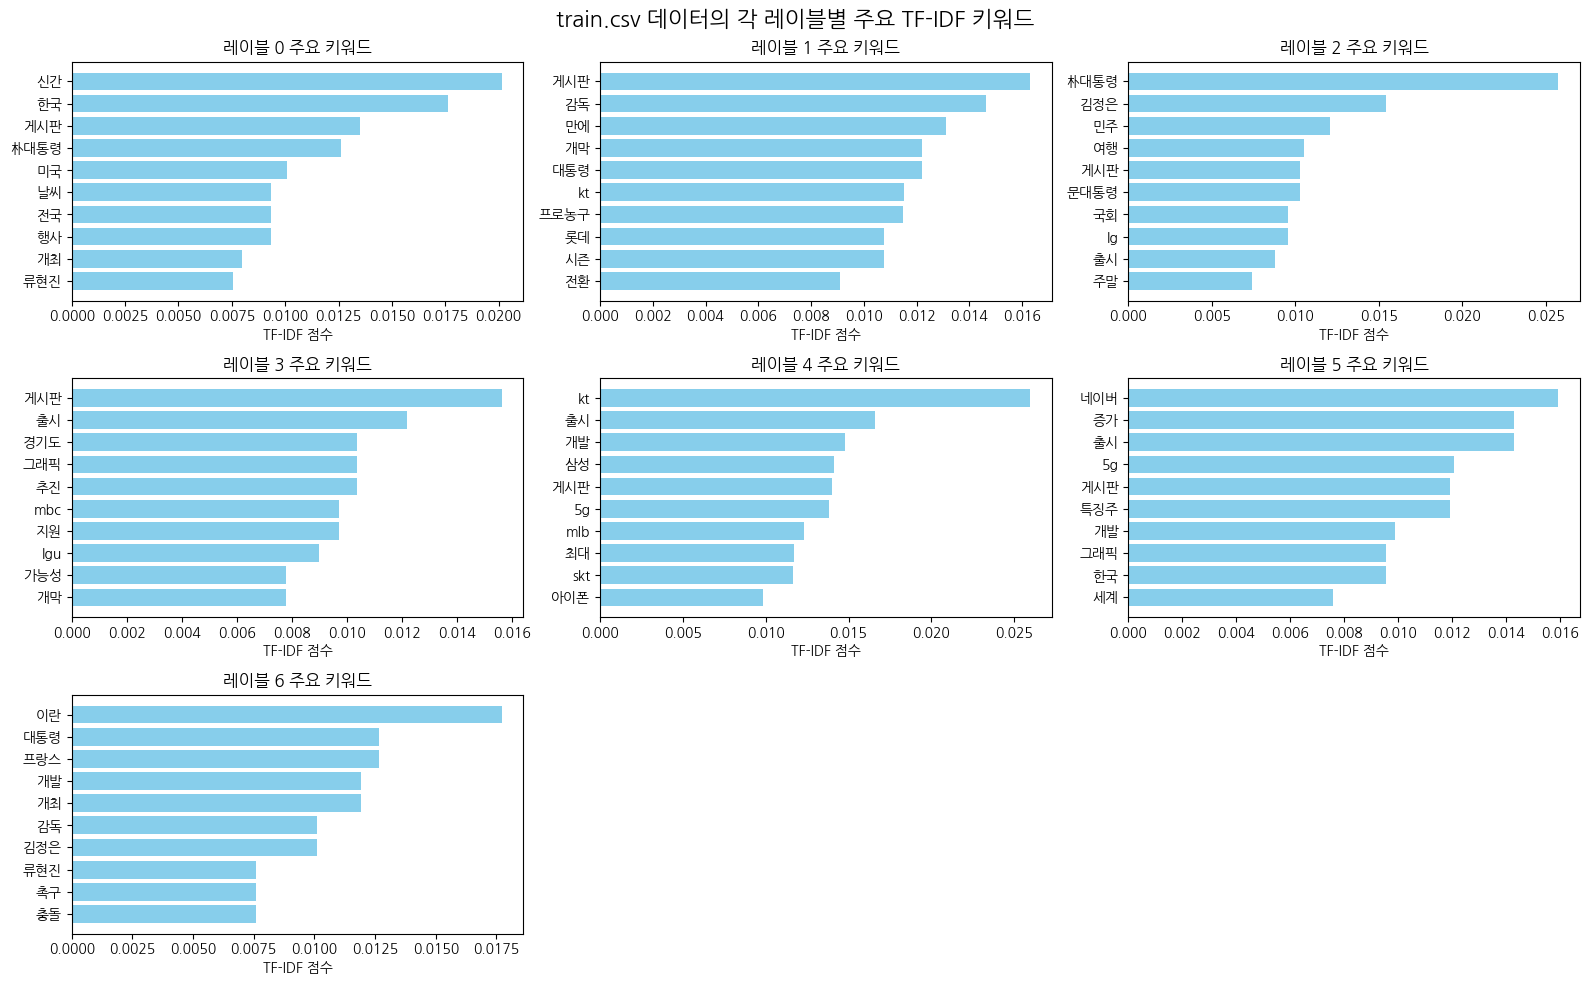

In [3]:
import matplotlib.pyplot as plt

# 각 레이블의 주요 키워드에 대한 막대 차트를 그리기
plt.figure(figsize=(16, 10))

# 레이블을 정렬하여 0번 레이블부터 오름차순으로 표시되도록 설정
for i, (label, keywords) in enumerate(sorted(tfidf_keywords_origin.items())):
    # 키워드와 해당하는 TF-IDF 점수 추출
    keywords, scores = zip(*keywords)
    plt.subplot(3, 3, i + 1)  # 레이블 수에 따라 레이아웃 조정
    plt.barh(keywords, scores, color='skyblue')
    plt.xlabel("TF-IDF 점수")
    plt.title(f"레이블 {label} 주요 키워드")
    plt.gca().invert_yaxis()  # 가독성을 위해 y-축을 반전

# 전체 제목 추가
plt.suptitle("train.csv 데이터의 각 레이블별 주요 TF-IDF 키워드", fontsize=16)

plt.tight_layout()
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
data_path = '../../combined_clean_train.csv'
data = pd.read_csv(data_path)

# NaN 값 제거
data.dropna(subset=['text'], inplace=True)

tfidf_vectorizer = TfidfVectorizer(max_features=10, stop_words=None)

# 각 레이블의 TF-IDF 결과를 저장할 딕셔너리 초기화
tfidf_keywords = {}

# 각 레이블 그룹에 대해 TF-IDF 계산
for label in data['target'].unique():
    # 현재 레이블의 데이터를 필터링
    label_texts = data[data['target'] == label]['text']
    # 현재 레이블의 텍스트에 TF-IDF 벡터라이저 학습
    tfidf_matrix = tfidf_vectorizer.fit_transform(label_texts)
    # 특징 이름과 해당 TF-IDF 점수 가져오기
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().mean(axis=0)  # 문서별 TF-IDF 점수 평균 계산
    # TF-IDF 점수를 기준으로 특징 정렬
    sorted_features = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    # 현재 레이블에 대한 주요 키워드 저장
    tfidf_keywords[label] = sorted_features

tfidf_keywords


{4: [('출시', 0.03653808004027831),
  ('갤럭시', 0.03631872274092829),
  ('kt', 0.02711794165208853),
  ('5g', 0.026222542581676236),
  ('삼성', 0.02561188842191723),
  ('서비스', 0.020573528631674217),
  ('개발', 0.018983021628538297),
  ('종합', 0.018399738383272794),
  ('스마트폰', 0.016298485501582905),
  ('ai', 0.015657048325534374)],
 3: [('관련', 0.024216811106408248),
  ('게시판', 0.01997061617789082),
  ('사고', 0.015584415584415584),
  ('코로나', 0.015584415584415584),
  ('지원', 0.014870281948749536),
  ('학교', 0.014795618663125565),
  ('온라인', 0.012253865136507154),
  ('kt', 0.01222625137970532),
  ('출시', 0.01222625137970532),
  ('논란', 0.011686944465514756)],
 2: [('북한', 0.0567212003724656),
  ('박대통령', 0.03565123004532509),
  ('종합', 0.03492951771551739),
  ('김정은', 0.03220943452614838),
  ('대통령', 0.02996823091846413),
  ('후보', 0.019631837295804845),
  ('논란', 0.018740897231323526),
  ('문재인', 0.01717704014516851),
  ('청와대', 0.017086032454643397),
  ('방문', 0.015545058352594465)],
 5: [('증가', 0.029524490566810

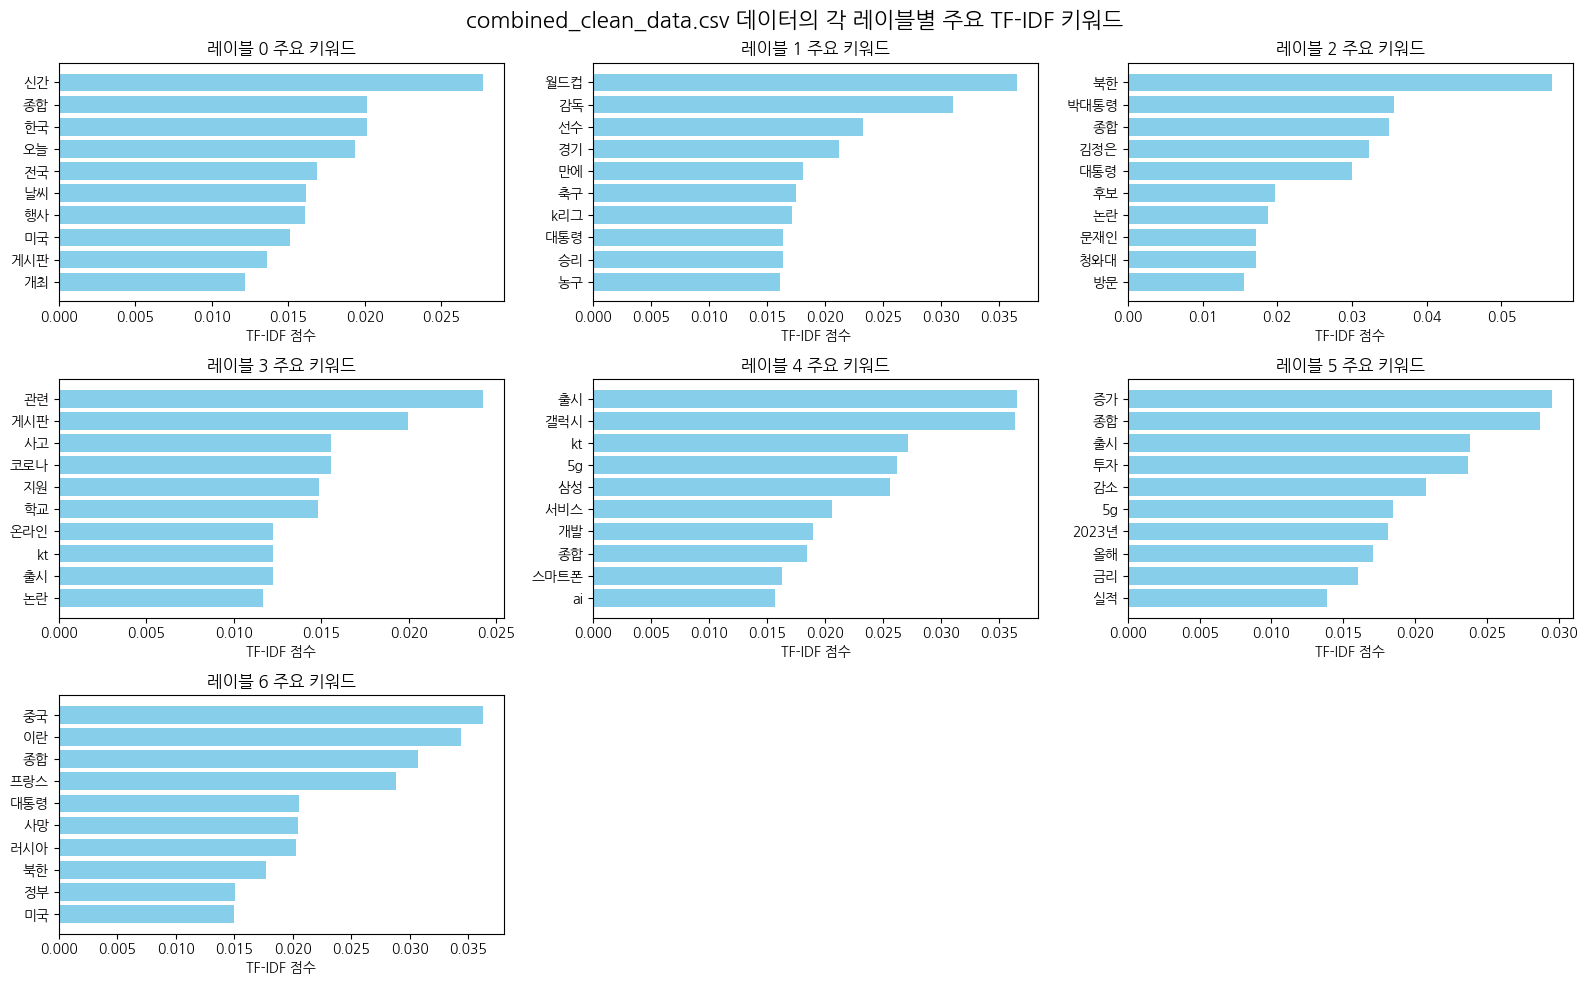

In [5]:
import matplotlib.pyplot as plt

# 각 레이블의 주요 키워드에 대한 막대 차트를 그리기
plt.figure(figsize=(16, 10))

# 레이블을 정렬하여 0번 레이블부터 오름차순으로 표시되도록 설정
for i, (label, keywords) in enumerate(sorted(tfidf_keywords.items())):
    # 키워드와 해당하는 TF-IDF 점수 추출
    keywords, scores = zip(*keywords)
    plt.subplot(3, 3, i + 1)  # 레이블 수에 따라 레이아웃 조정
    plt.barh(keywords, scores, color='skyblue')
    plt.xlabel("TF-IDF 점수")
    plt.title(f"레이블 {label} 주요 키워드")
    plt.gca().invert_yaxis()  # 가독성을 위해 y-축을 반전

# 전체 제목 추가
plt.suptitle("combined_clean_data.csv 데이터의 각 레이블별 주요 TF-IDF 키워드", fontsize=16)

plt.tight_layout()
plt.show()
